In this notebooke, we load data and models used for experiments in §4 and assess their performance. There are two triples of regressor ensembles: 
1) models Regressor_CatBoost_1, Regressor_LightGBM_1 and Regressor_XGB_1 for the [Superconductivity dataset](https://archive.ics.uci.edu/ml/datasets/superconductivty+data) which is split into train1, val1 and test1;

2) models Regressor_CatBoost_2, Regressor_LightGBM_2 and Regressor_XGB_2 for the [Ailerons dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/ailerons.html) which is split into train2, val2 and test2.

The hyperparameters used for training can be found in hyperparameters.txt. 

In [1]:
import sklearn
import pandas as pd
import numpy as np
import shap
import json 
import random 
import matplotlib.pyplot as plt

import catboost
import lightgbm
import xgboost

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
#We load the first dataset and the first triple of models. For the second one, change the code accordingly. 

X_train=pd.read_csv('train1.csv').iloc[:,:-1]
y_train=pd.read_csv('train1.csv').iloc[:,-1]

X_val=pd.read_csv('val1.csv').iloc[:,:-1]
y_val=pd.read_csv('val1.csv').iloc[:,-1]

X_test=pd.read_csv('test1.csv').iloc[:,:-1]
y_test=pd.read_csv('test1.csv').iloc[:,-1]


cbr=CatBoostRegressor()
cbr.load_model('Regressor_CatBoost_1.model')

lgr = lightgbm.Booster(model_file='Regressor_LightGBM_1.model')

xgr=xgboost.Booster()
xgr.load_model('Regressor_XGB_1.model')

In [3]:
y_pred_cat=cbr.predict(X_test)
y_pred_lgbm=lgr.predict(X_test)
y_pred_xgb=xgr.predict(xgboost.DMatrix(X_test.values))

In [4]:
#Comparing the predictions over the test set via the explained variance score. 
from sklearn.metrics import explained_variance_score

#The models have reasonable predictive power:
print(explained_variance_score(y_test,y_pred_cat))
print(explained_variance_score(y_test,y_pred_lgbm))
print(explained_variance_score(y_test,y_pred_xgb))

#The outputs of the models over the test set are very close:
print(explained_variance_score(y_pred_cat,y_pred_lgbm))
print(explained_variance_score(y_pred_lgbm,y_pred_xgb))
print(explained_variance_score(y_pred_xgb,y_pred_cat))


0.9206496859204005
0.9211684999793526
0.9165611779641943
0.9903844233413885
0.9809276149186525
0.9787685465915256


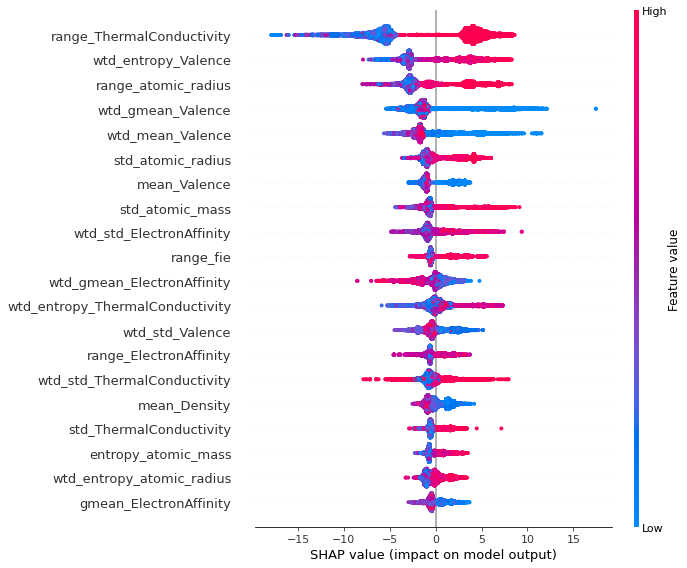

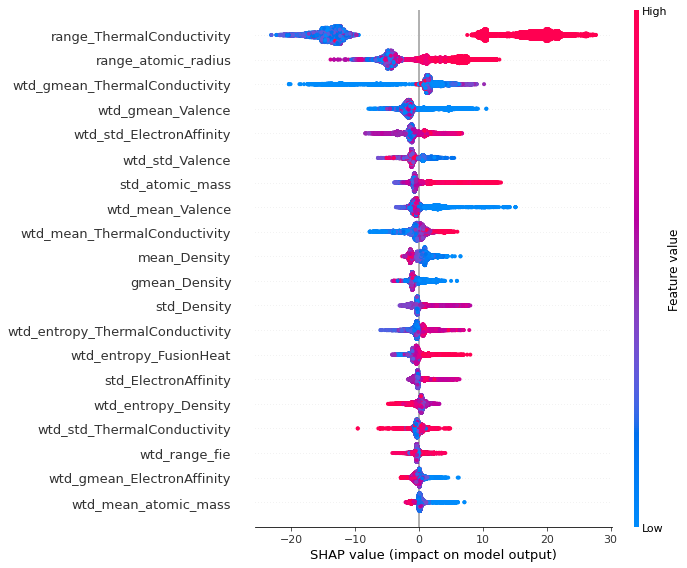

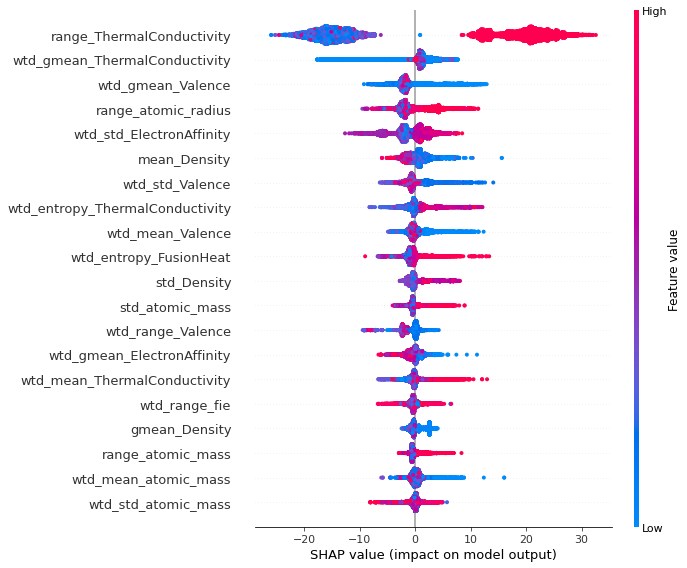

In [5]:
#Shap summary plots generated over the whole data:
shap_values_total_cbr=shap.TreeExplainer(cbr,feature_perturbation='tree_path_dependent').shap_values(pd.concat([X_train,X_val,X_test]))
shap.summary_plot(shap_values_total_cbr,pd.concat([X_train,X_val,X_test]))

lgr.params["objective"] = "regression"
shap_values_total_lgr=shap.TreeExplainer(lgr,feature_perturbation='tree_path_dependent').shap_values(pd.concat([X_train,X_val,X_test]))
shap.summary_plot(shap_values_total_lgr,pd.concat([X_train,X_val,X_test]))

shap_values_total_xgr=shap.TreeExplainer(xgr,feature_perturbation='tree_path_dependent').shap_values(pd.concat([X_train,X_val,X_test]))
shap.summary_plot(shap_values_total_xgr,pd.concat([X_train,X_val,X_test]))